In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


### Loading the file

In [80]:
import numpy as np 
import pandas as pd 

heart_dataset=pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
heart_dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [81]:
## Descriptive Statistics
heart_dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [82]:
## Missing Values
heart_dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [83]:
heart_encoded_data = pd.get_dummies(heart_dataset, columns = ['Sex', 'ChestPainType', 'RestingECG','ExerciseAngina','ST_Slope'])
heart_encoded_data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,False,True,False,...,False,True,False,True,False,True,False,False,True,False
914,68,144,193,1,141,3.4,1,False,True,True,...,False,False,False,True,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False
916,57,130,236,0,174,0.0,1,True,False,False,...,False,False,True,False,False,True,False,False,True,False


In [84]:
heart_encoded_data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [85]:
heart_encoded_data = heart_encoded_data.replace({True: 1, False: 0})
heart_encoded_data

/tmp/ipykernel_33/999127147.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heart_encoded_data = heart_encoded_data.replace({True: 1, False: 0})


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [86]:
heart_encoded_data.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [87]:
columns_to_keep = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
                   'HeartDisease','Sex_F','ChestPainType_ASY','ChestPainType_ATA',
                   'ChestPainType_NAP','RestingECG_LVH', 'RestingECG_Normal','RestingECG_ST',
                   'ExerciseAngina_N','ST_Slope_Down','ST_Slope_Flat']
df_filtered = heart_encoded_data[columns_to_keep]

In [88]:
df_filtered

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ST_Slope_Down,ST_Slope_Flat
0,40,140,289,0,172,0.0,0,0,0,1,0,0,1,0,1,0,0
1,49,160,180,0,156,1.0,1,1,0,0,1,0,1,0,1,0,1
2,37,130,283,0,98,0.0,0,0,0,1,0,0,0,1,1,0,0
3,48,138,214,0,108,1.5,1,1,1,0,0,0,1,0,0,0,1
4,54,150,195,0,122,0.0,0,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,0,0,0,0,1,0,1,0,1
914,68,144,193,1,141,3.4,1,0,1,0,0,0,1,0,1,0,1
915,57,130,131,0,115,1.2,1,0,1,0,0,0,1,0,0,0,1
916,57,130,236,0,174,0.0,1,1,0,1,0,1,0,0,1,0,1


{'whiskers': [<matplotlib.lines.Line2D at 0x7ec0193b6470>,
 'caps': [<matplotlib.lines.Line2D at 0x7ec0193b69b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ec0193b61d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ec0193b6ef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ec0193b7190>],
 'means': []}

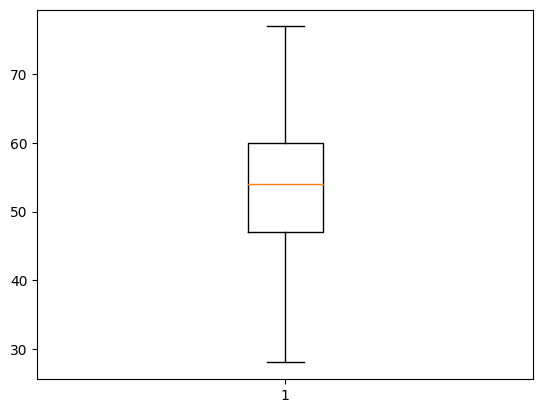

In [89]:
## Checking for outliers
import matplotlib.pyplot as plt
plt.boxplot(df_filtered['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ec019224dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ec0191f9b40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ec019224b20>],
 'medians': [<matplotlib.lines.Line2D at 0x7ec0192250f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ec019225240>],
 'means': []}

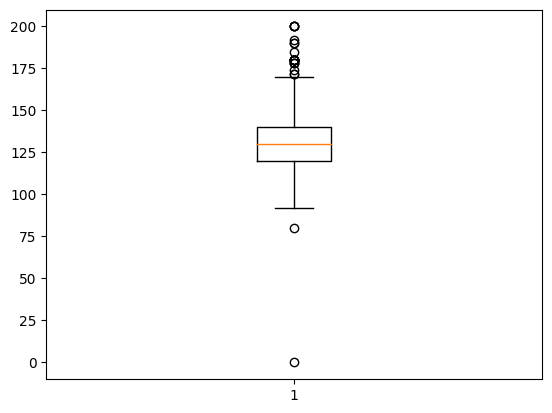

In [90]:
## Checking for outliers
import matplotlib.pyplot as plt
plt.boxplot(df_filtered['RestingBP'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ec019299300>,
 'caps': [<matplotlib.lines.Line2D at 0x7ec019299720>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ec019298fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ec019299c60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ec019299f00>],
 'means': []}

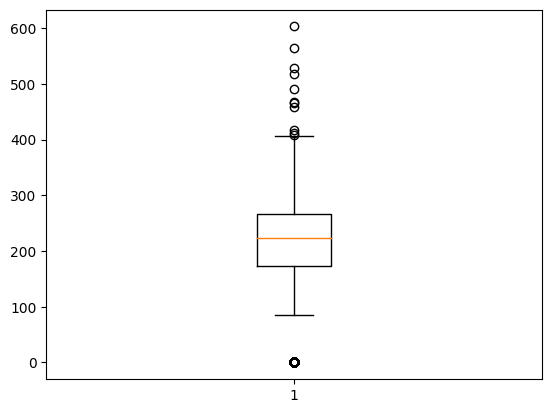

In [91]:
## Checking for outliers
import matplotlib.pyplot as plt
plt.boxplot(df_filtered['Cholesterol'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ec01911cca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ec01911d1e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ec01911ca30>],
 'medians': [<matplotlib.lines.Line2D at 0x7ec01911d720>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ec0190f6230>],
 'means': []}

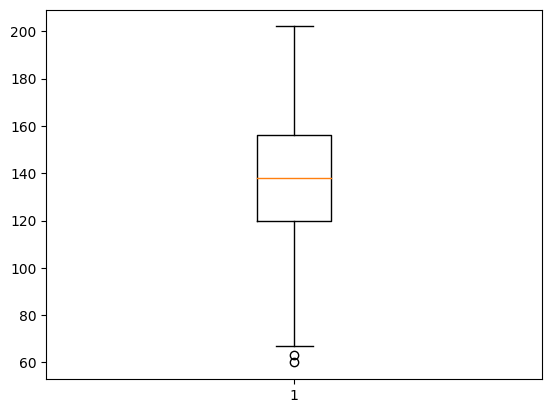

In [92]:
## Checking for outliers
import matplotlib.pyplot as plt
plt.boxplot(df_filtered['MaxHR'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ec0191940a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ec0191945e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ec01916bdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ec019194b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ec019194dc0>],
 'means': []}

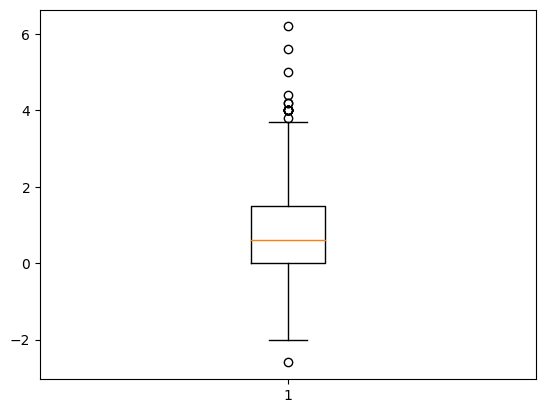

In [93]:
## Checking for outliers
import matplotlib.pyplot as plt
plt.boxplot(df_filtered['Oldpeak'])

In [94]:
df_filtered.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ST_Slope_Down,ST_Slope_Flat
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039,-0.055750,0.166607,-0.218165,-0.011335,0.145727,-0.230566,0.136798,-0.215793,0.138397,0.185568
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589,-0.005133,0.048824,-0.046153,-0.041348,0.053166,-0.116851,0.090447,-0.155101,-0.007912,0.099207
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741,0.200092,-0.120531,0.150954,-0.006634,0.177077,-0.038470,-0.133106,0.034166,-0.083371,-0.050953
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291,-0.120076,0.131176,-0.140514,-0.039249,-0.011656,-0.093028,0.127110,-0.060451,0.105102,0.107006
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421,0.189186,-0.354963,0.253735,0.134580,0.125793,0.023801,-0.157879,0.370425,-0.073316,-0.342581
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951,-0.105734,0.280026,-0.262124,-0.106212,0.086794,-0.116719,0.055958,-0.408752,0.322130,0.283295
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000,-0.305445,0.516716,-0.401924,-0.212964,0.010670,-0.091580,0.102527,-0.494282,0.122527,0.554134
Sex_F,-0.055750,-0.005133,0.200092,-0.120076,0.189186,-0.105734,-0.305445,1.000000,-0.183876,0.161522,0.066486,0.049518,0.010634,-0.063715,0.190664,-0.066036,-0.116077
ChestPainType_ASY,0.166607,0.048824,-0.120531,0.131176,-0.354963,0.280026,0.516716,-0.183876,1.000000,-0.522432,-0.577670,0.002289,-0.063606,0.076438,-0.430034,0.103407,0.303645
ChestPainType_ATA,-0.218165,-0.046153,0.150954,-0.140514,0.253735,-0.262124,-0.401924,0.161522,-0.522432,1.000000,-0.256767,-0.085791,0.107941,-0.046111,0.300365,-0.097754,-0.304667


In [95]:
# import seaborn as sns
# sns.pairplot(df_filtered)

### The variables are not extremely correlated

<Axes: >

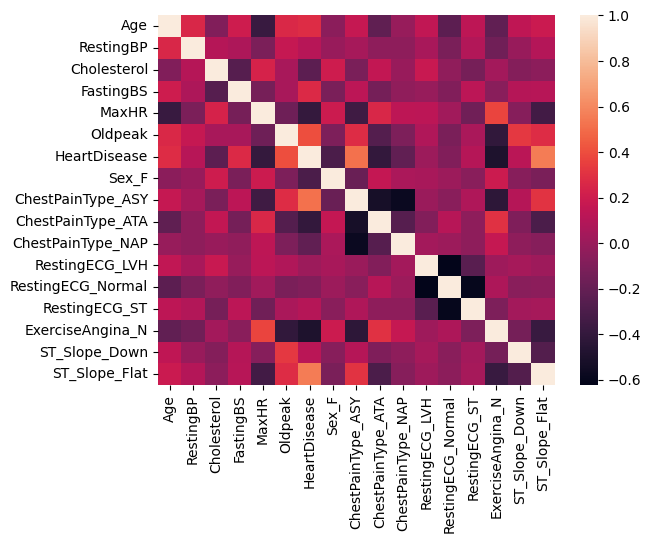

In [96]:
sns.heatmap(df_filtered.corr())

In [98]:
df_filtered

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ST_Slope_Down,ST_Slope_Flat
0,40,140,289,0,172,0.0,0,0,0,1,0,0,1,0,1,0,0
1,49,160,180,0,156,1.0,1,1,0,0,1,0,1,0,1,0,1
2,37,130,283,0,98,0.0,0,0,0,1,0,0,0,1,1,0,0
3,48,138,214,0,108,1.5,1,1,1,0,0,0,1,0,0,0,1
4,54,150,195,0,122,0.0,0,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,0,0,0,0,1,0,1,0,1
914,68,144,193,1,141,3.4,1,0,1,0,0,0,1,0,1,0,1
915,57,130,131,0,115,1.2,1,0,1,0,0,0,1,0,0,0,1
916,57,130,236,0,174,0.0,1,1,0,1,0,1,0,0,1,0,1


In [99]:
df_filtered.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'RestingECG_LVH', 'RestingECG_Normal',
       'RestingECG_ST', 'ExerciseAngina_N', 'ST_Slope_Down', 'ST_Slope_Flat'],
      dtype='object')

In [100]:
continuous_columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
binary_columns = ['HeartDisease', 'Sex_F', 'ChestPainType_ASY', 'ChestPainType_ATA',
                  'ChestPainType_NAP', 'RestingECG_LVH', 'RestingECG_Normal','RestingECG_ST',
                  'ExerciseAngina_N', 'ST_Slope_Down', 'ST_Slope_Flat']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the continuous data
df_filtered[continuous_columns] = scaler.fit_transform(df_filtered[continuous_columns])

/tmp/ipykernel_33/698033341.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[continuous_columns] = scaler.fit_transform(df_filtered[continuous_columns])


In [101]:
df_filtered

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ST_Slope_Down,ST_Slope_Flat
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0,0,0,1,0,0,1,0,1,0,0
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1,1,0,0,1,0,1,0,1,0,1
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0,0,0,1,0,0,0,1,1,0,0
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1,1,1,0,0,0,1,0,0,0,1
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.551341,-0.188999,0.293283,1,0,0,0,0,0,1,0,1,0,1
914,1.536902,0.627078,-0.053049,1.813758,0.164684,2.357094,1,0,1,0,0,0,1,0,1,0,1
915,0.370100,-0.129513,-0.620168,-0.551341,-0.857069,0.293283,1,0,1,0,0,0,1,0,0,0,1
916,0.370100,-0.129513,0.340275,-0.551341,1.461525,-0.832432,1,1,0,1,0,1,0,0,1,0,1


In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [103]:
# Features and target variable
X = df_filtered[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
        'Sex_F', 'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP',
        'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
        'ExerciseAngina_N', 'ST_Slope_Down', 'ST_Slope_Flat']]
y = df_filtered['HeartDisease']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [104]:
# Create a logistic regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)


LogisticRegression()

In [105]:
# Predict the target on the test dataset
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')


Accuracy: 0.8586956521739131
Confusion Matrix:
[[68  9]
 [17 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

